**Determinants of GDP across countries (2000-2023)** (candidate project for Master thesis)

How do unemployment rate, inflation, and population affect GDP across countries over time? 

- Countries: United States, Canada, Germany, United Kingdom, France, Japan, Australia, South Korea.
- Data: panel data
- Frequency: yearly
- Source: World Bank


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
from linearmodels.panel import RandomEffects
import statsmodels.api as sm

In [3]:
GDP = pd.read_csv('GDP_data.csv')
print(GDP.head())


         Series Name     Series Code    Country Name Country Code  \
0  GDP (current US$)  NY.GDP.MKTP.CD   United States          USA   
1  GDP (current US$)  NY.GDP.MKTP.CD          Canada          CAN   
2  GDP (current US$)  NY.GDP.MKTP.CD         Germany          DEU   
3  GDP (current US$)  NY.GDP.MKTP.CD  United Kingdom          GBR   
4  GDP (current US$)  NY.GDP.MKTP.CD          France          FRA   

   2000 [YR2000]  2001 [YR2001]  2002 [YR2002]  2003 [YR2003]  2004 [YR2004]  \
0   1.025100e+13   1.058190e+13   1.092910e+13   1.145650e+13   1.221720e+13   
1   7.447730e+11   7.389820e+11   7.606490e+11   8.955410e+11   1.026690e+12   
2   1.966980e+12   1.966380e+12   2.102350e+12   2.534720e+12   2.852320e+12   
3   1.665530e+12   1.649830e+12   1.785730e+12   2.054420e+12   2.421530e+12   
4   1.360960e+12   1.370380e+12   1.492430e+12   1.835100e+12   2.109790e+12   

   2005 [YR2005]  ...  2014 [YR2014]  2015 [YR2015]  2016 [YR2016]  \
0   1.303920e+13  ...   1.760810e+

In [7]:
GDP_long = pd.melt(GDP, 
                   id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'], 
                   var_name='Year', 
                   value_name='GDP')

# Clean the 'Year' column
GDP_long['Year'] = GDP_long['Year'].str.extract('(\d{4})').astype(int)

print(GDP_long.head())
# The reason for doing this part of the code is to reshape the GDP data from a wide format to a long format.
# In the wide format, each year is a separate column, which makes it difficult to analyze trends over time or perform panel data analysis.
# By melting the DataFrame, we convert it into a long format where each row represents a single observation of GDP for a specific country and year.
# This format is more suitable for time series analysis and allows us to easily group and aggregate the data by country and year.

     Country Name Country Code        Series Name     Series Code  Year  \
0   United States          USA  GDP (current US$)  NY.GDP.MKTP.CD  2000   
1          Canada          CAN  GDP (current US$)  NY.GDP.MKTP.CD  2000   
2         Germany          DEU  GDP (current US$)  NY.GDP.MKTP.CD  2000   
3  United Kingdom          GBR  GDP (current US$)  NY.GDP.MKTP.CD  2000   
4          France          FRA  GDP (current US$)  NY.GDP.MKTP.CD  2000   

            GDP  
0  1.025100e+13  
1  7.447730e+11  
2  1.966980e+12  
3  1.665530e+12  
4  1.360960e+12  


<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\diego\AppData\Local\Temp\ipykernel_7892\1203311427.py:7: SyntaxWarning: invalid escape sequence '\d'
  GDP_long['Year'] = GDP_long['Year'].str.extract('(\d{4})').astype(int)


In [8]:
# Do the same process for the remaining variables for this project. Note that the data was conventionally stored in wide format, with each year as a separate column. 
Inflation = pd.read_csv('Inflation_data.csv')

Inflation_long = pd.melt(Inflation, 
                   id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'], 
                   var_name='Year', 
                   value_name='Inflation Rate')

# Clean the 'Year' column
Inflation_long['Year'] = Inflation_long['Year'].str.extract('(\d{4})').astype(int)

print(Inflation_long.head())


     Country Name Country Code                            Series Name  \
0   United States          USA  Inflation, consumer prices (annual %)   
1          Canada          CAN  Inflation, consumer prices (annual %)   
2         Germany          DEU  Inflation, consumer prices (annual %)   
3  United Kingdom          GBR  Inflation, consumer prices (annual %)   
4          France          FRA  Inflation, consumer prices (annual %)   

      Series Code  Year  Inflation Rate  
0  FP.CPI.TOTL.ZG  2000        3.376857  
1  FP.CPI.TOTL.ZG  2000        2.719440  
2  FP.CPI.TOTL.ZG  2000        1.440268  
3  FP.CPI.TOTL.ZG  2000        1.182956  
4  FP.CPI.TOTL.ZG  2000        1.675960  


<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
C:\Users\diego\AppData\Local\Temp\ipykernel_7892\2666278588.py:10: SyntaxWarning: invalid escape sequence '\d'
  Inflation_long['Year'] = Inflation_long['Year'].str.extract('(\d{4})').astype(int)


In [12]:
Population = pd.read_csv('Population_data.csv')

Population_long = pd.melt(Population, 
                   id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'], 
                   var_name='Year', 
                   value_name='Population')

# Clean the 'Year' column
Population_long['Year'] = Population_long['Year'].str.extract('(\d{4})').astype(int)

print(Population_long.head())

     Country Name Country Code        Series Name  Series Code  Year  \
0   United States          USA  Population, total  SP.POP.TOTL  2000   
1          Canada          CAN  Population, total  SP.POP.TOTL  2000   
2         Germany          DEU  Population, total  SP.POP.TOTL  2000   
3  United Kingdom          GBR  Population, total  SP.POP.TOTL  2000   
4          France          FRA  Population, total  SP.POP.TOTL  2000   

    Population  
0  282162411.0  
1   30685730.0  
2   82211508.0  
3   58892514.0  
4   60918661.0  


<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
C:\Users\diego\AppData\Local\Temp\ipykernel_7892\1438613017.py:9: SyntaxWarning: invalid escape sequence '\d'
  Population_long['Year'] = Population_long['Year'].str.extract('(\d{4})').astype(int)


In [10]:
Unemployment = pd.read_csv('Unemployment_data.csv')

Unemployment_long = pd.melt(Unemployment, 
                   id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'], 
                   var_name='Year', 
                   value_name='Unemployment Rate')

# Clean the 'Year' column
Unemployment_long['Year'] = Unemployment_long['Year'].str.extract('(\d{4})').astype(int)

print(Unemployment_long.head())

     Country Name Country Code  \
0   United States          USA   
1          Canada          CAN   
2         Germany          DEU   
3  United Kingdom          GBR   
4          France          FRA   

                                         Series Name     Series Code  Year  \
0  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS  2000   
1  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS  2000   
2  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS  2000   
3  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS  2000   
4  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS  2000   

   Unemployment Rate  
0              3.992  
1              6.829  
2              7.917  
3              5.558  
4             10.218  


<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
C:\Users\diego\AppData\Local\Temp\ipykernel_7892\428736627.py:9: SyntaxWarning: invalid escape sequence '\d'
  Unemployment_long['Year'] = Unemployment_long['Year'].str.extract('(\d{4})').astype(int)


In [ ]:
# Merge, keeping only necessary columns to avoid duplicate column names
df = GDP_long[['Country Name', 'Country Code', 'Year', 'GDP']].merge(
	Unemployment_long[['Country Name', 'Country Code', 'Year', 'Unemployment Rate']],
	on=['Country Name', 'Country Code', 'Year']
)
df = df.merge(
	Inflation_long[['Country Name', 'Country Code', 'Year', 'Inflation Rate']],
	on=['Country Name', 'Country Code', 'Year']
)
df = df.merge(
	Population_long[['Country Name', 'Country Code', 'Year', 'Population']],
	on=['Country Name', 'Country Code', 'Year']
)

# Drop missing values
df.dropna(inplace=True)

# Set panel structure
df.set_index(['Country Code', 'Year'], inplace=True)

print(df.head())

                     Country Name           GDP  Unemployment Rate  \
Country Code Year                                                    
USA          2000   United States  1.025100e+13              3.992   
CAN          2000          Canada  7.447730e+11              6.829   
DEU          2000         Germany  1.966980e+12              7.917   
GBR          2000  United Kingdom  1.665530e+12              5.558   
FRA          2000          France  1.360960e+12             10.218   

                   Inflation Rate   Population  
Country Code Year                               
USA          2000        3.376857  282162411.0  
CAN          2000        2.719440   30685730.0  
DEU          2000        1.440268   82211508.0  
GBR          2000        1.182956   58892514.0  
FRA          2000        1.675960   60918661.0  


                GDP  Unemployment Rate  Inflation Rate
count  1.680000e+02         168.000000      168.000000
mean   4.713396e+12           6.100357        1.995930
std    5.441486e+12           2.070536        1.619550
min    3.796290e+11           2.351000       -1.352837
25%    1.684528e+12           4.607500        1.086413
50%    2.790575e+12           5.627500        1.794541
75%    4.539212e+12           7.674750        2.587021
max    2.772070e+13          11.193000        8.002800


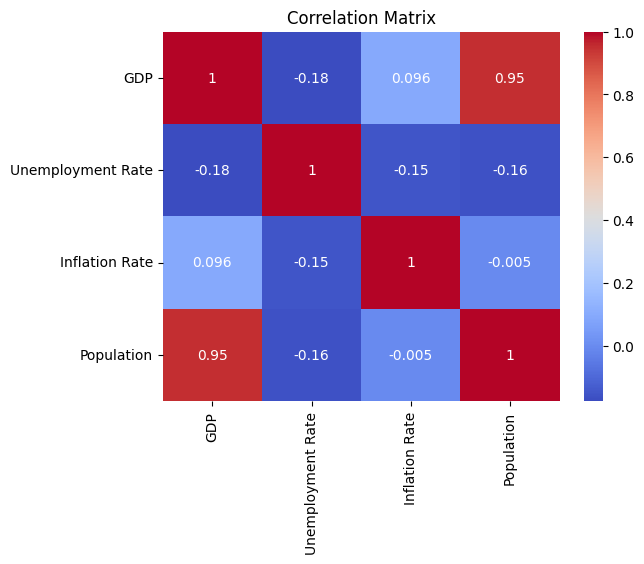

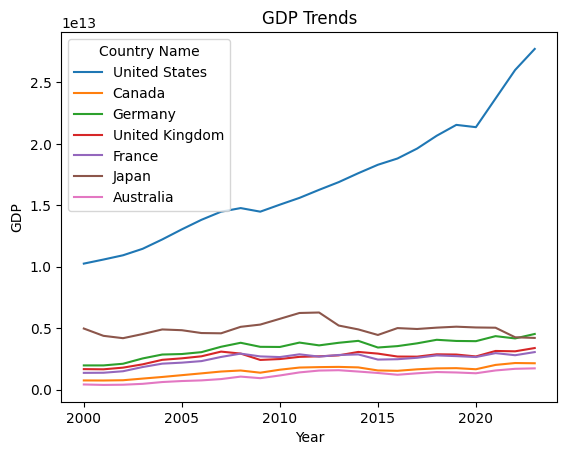

In [ ]:
# Summary statistics
print(df.describe())

# Correlation heatmap (only numeric columns)
df['Population'] = pd.to_numeric(df['Population'], errors='coerce') # It did not recognize Population as numeric, so this fixes it. 
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Plot GDP trends
df.reset_index(inplace=True)
sns.lineplot(data=df, x='Year', y='GDP', hue='Country Name')
plt.title('GDP Trends')
plt.show()

# Reset index to panel structure
df.set_index(['Country Code', 'Year'], inplace=True)


- Low correlation among all variables with the expection of GDP and population, with 0.95. This is not alarming, given that it is logical that a higher population implies a higher workforce, which results in a higher GDP. 
- Evident increasing trend in GDP for the United States in comparison with the other countries observed. 

In [ ]:
# Panel data models
# Pooled OLS model
# This model assumes that the relationship between the dependent and independent variables is the same across all countries.
y = df['GDP']
X = df[['Unemployment Rate', 'Inflation Rate', 'Population']]
X = sm.add_constant(X)

pooled_ols = sm.OLS(y, X).fit()
print(pooled_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     625.9
Date:                Sun, 22 Jun 2025   Prob (F-statistic):           1.56e-89
Time:                        21:25:19   Log-Likelihood:                -4952.7
No. Observations:                 168   AIC:                             9913.
Df Residuals:                     164   BIC:                             9926.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.535e+12   4.71e+1

- The relationship between unemployment rate and GDP is not statistically significant, which is counterintuitive. 

In [26]:
# Fixed Effects model
# This model accounts for country-specific effects that do not change over time.
fe_model = PanelOLS.from_formula('GDP ~ `Unemployment Rate` + `Inflation Rate` + Population + EntityEffects', data=df)
fe_results = fe_model.fit(cov_type='robust')
print(fe_results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                    GDP   R-squared:                        0.8756
Estimator:                   PanelOLS   R-squared (Between):             -15.024
No. Observations:                 168   R-squared (Within):               0.8756
Date:                Sun, Jun 22 2025   R-squared (Overall):             -13.978
Time:                        21:31:08   Log-likelihood                   -4808.0
Cov. Estimator:                Robust                                           
                                        F-statistic:                      370.79
Entities:                           7   P-value                           0.0000
Avg Obs:                       24.000   Distribution:                   F(3,158)
Min Obs:                       24.000                                           
Max Obs:                       24.000   F-statistic (robust):             90.080
                            

Why did it drop the population variable?
The population variable was dropped from the fixed effects model because it is perfectly collinear with the entity effects.
In a fixed effects model, the entity effects (country-specific effects) capture all time-invariant characteristics of the countries, including population.
Therefore, including population as a separate variable would lead to perfect multicollinearity, causing it to be dropped from the model. 

In [29]:
# Random Effects model
# This model assumes that the country-specific effects are uncorrelated with the independent variables.
re_model = RandomEffects.from_formula('GDP ~ `Unemployment Rate` + `Inflation Rate` + Population', data=df)
re_results = re_model.fit()
print(re_results.summary)

                        RandomEffects Estimation Summary                        
Dep. Variable:                    GDP   R-squared:                        0.6121
Estimator:              RandomEffects   R-squared (Between):              0.9394
No. Observations:                 168   R-squared (Within):               0.4291
Date:                Sun, Jun 22 2025   R-squared (Overall):              0.9058
Time:                        21:36:03   Log-likelihood                   -4940.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      86.806
Entities:                           7   P-value                           0.0000
Avg Obs:                       24.000   Distribution:                   F(3,165)
Min Obs:                       24.000                                           
Max Obs:                       24.000   F-statistic (robust):             86.806
                            

Unemployment rate and Population are statistically significant in this model. 

In [39]:
# Model comparison
# Compare Fixed Effects and Random Effects models
from linearmodels.panel import compare

comparison = compare({'Fixed Effects': fe_results, 'Random Effects': re_results})
print(comparison)

# The 'hausman' function is not available in linearmodels.panel as of recent versions. So, we will implement the Hausman test manually.
# Hausman test for Fixed vs Random Effects

import numpy as np

# Get the coefficients and covariance matrices for the common regressors
b_FE = fe_results.params
b_RE = re_results.params

# Align the coefficients (drop entity effects if present)
common_coef = b_FE.index.intersection(b_RE.index)
b_FE = b_FE[common_coef]
b_RE = b_RE[common_coef]

V_FE = fe_results.cov
V_RE = re_results.cov
V_FE = V_FE.loc[common_coef, common_coef]
V_RE = V_RE.loc[common_coef, common_coef]

# Hausman test statistic
diff = b_FE - b_RE
V_diff = V_FE - V_RE
stat = float(diff.T @ np.linalg.inv(V_diff) @ diff)
df = diff.shape[0]
from scipy.stats import chi2
pval = 1 - chi2.cdf(stat, df)

print("Hausman test statistic:", stat)
print("Hausman test p-value:", pval)




                    Model Comparison                    
                         Fixed Effects    Random Effects
--------------------------------------------------------
Dep. Variable                      GDP               GDP
Estimator                     PanelOLS     RandomEffects
No. Observations                   168               168
Cov. Est.                       Robust        Unadjusted
R-squared                       0.8756            0.6121
R-Squared (Within)              0.8756            0.4291
R-Squared (Between)            -15.024            0.9394
R-Squared (Overall)            -13.978            0.9058
F-statistic                     370.79            86.806
P-value (F-stat)                0.0000            0.0000
=====================     ============   ===============
Unemployment Rate           -1.517e+11        -2.659e+11
                             (-4.4695)         (-4.0852)
Inflation Rate               6.496e+10         8.405e+10
                              (

Conclusion: 

- The results indicate that the Fixed Effects model is preferred over the Random Effects model based on the Hausman test.
- The p-value is less than 0.05, suggesting that the country-specific effects are correlated with the independent variables, which is a - key assumption of the Fixed Effects model.
- Unemployment rate and Population are statistically significant in this model.
- The unemployment rate has a negative coefficient, indicating that higher unemployment is associated with lower GDP.
- The population variable is positively associated with GDP, suggesting that larger populations contribute to higher GDP.   